IMPORTING LIBRARIES

In [2338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


IMPORTING DATASETS

In [2339]:
rd_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data r&d.csv")

capex_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data capex.csv")

current_ratio_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data current ratio.csv")

interest_coverage_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data interest coverage ratio.csv")

ebit_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data ebit.csv")

total_assets_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data total assets.csv")

debt_assets_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Data total debt to total assets.csv")

operating_margin_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Operating margin.csv")

roa_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/ROA.csv")

revenue_growth_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/Revenue growth.csv")

cce_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/cash and cash eq.csv")

debt_equity_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/debt to equity.csv")

free_cashflow_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/free cashflow.csv")

patents_data = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/patents.csv")

altman_2016 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2016.csv")

altman_2017 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2017.csv")

altman_2018 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2018.csv")

altman_2019 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2019.csv")

altman_2020 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2020.csv")

altman_2021 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2021.csv")

altman_2022 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2022.csv")

altman_2023 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2023.csv")

altman_2024 = pd.read_csv("/Users/stivenmenekshi/Desktop/Bocconi/Year 3/Final paper/final data/z score 2024.csv")


CLEANING DATASETS AND MERGING THEM

In [2340]:
rd_data=rd_data.iloc[2:].reset_index(drop=True)

capex_data=capex_data.iloc[2:].reset_index(drop=True)

current_ratio_data=current_ratio_data.iloc[2:].reset_index(drop=True)

ebit_data=ebit_data.iloc[2:].reset_index(drop=True)

interest_coverage_data=interest_coverage_data.iloc[2:].reset_index(drop=True)

total_assets_data=total_assets_data.iloc[2:].reset_index(drop=True)

debt_assets_data=debt_assets_data.iloc[2:].reset_index(drop=True)

operating_margin_data = operating_margin_data.iloc[2:].reset_index(drop=True)

roa_data = roa_data.iloc[2:].reset_index(drop=True)

revenue_growth_data = revenue_growth_data.iloc[2:].reset_index(drop=True)

cce_data = cce_data.iloc[2:].reset_index(drop=True)

debt_equity_data = debt_equity_data.iloc[2:].reset_index(drop=True)

free_cashflow_data = free_cashflow_data.iloc[2:].reset_index(drop=True)

patents_data = patents_data.iloc[2:].reset_index(drop=True)

altman_2016=altman_2016.iloc[2:].reset_index(drop=True)

altman_2017=altman_2017.iloc[2:].reset_index(drop=True)

altman_2018=altman_2018.iloc[2:].reset_index(drop=True)

altman_2019=altman_2019.iloc[2:].reset_index(drop=True)

altman_2020=altman_2020.iloc[2:].reset_index(drop=True)

altman_2021=altman_2021.iloc[2:].reset_index(drop=True)

altman_2022=altman_2022.iloc[2:].reset_index(drop=True)

altman_2023=altman_2023.iloc[2:].reset_index(drop=True)

altman_2024=altman_2024.iloc[2:].reset_index(drop=True)

In [2341]:
rd_data_long = pd.melt(rd_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['R&D Exp:2016', 'R&D Exp:2017', 'R&D Exp:2018', 'R&D Exp:2019', 'R&D Exp:2020', 'R&D Exp:2021','R&D Exp:2022', 'R&D Exp:2023', 'R&D Exp:2024'],
                 var_name='Year',
                 value_name='RD_Expense')

rd_data_long['Year'] = rd_data_long['Year'].str.extract('(\d{4})').astype(int)

capex_data_long = pd.melt(capex_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['CAPEX:2016', 'CAPEX:2017', 'CAPEX:2018', 'CAPEX:2019', 'CAPEX:2020', 'CAPEX:2021', 'CAPEX:2022', 'CAPEX:2023', 'CAPEX:2024'],
                 var_name='Year',
                 value_name='CAPEX')

capex_data_long['Year'] = capex_data_long['Year'].str.extract('(\d{4})').astype(int)

current_ratio_data_long = pd.melt(current_ratio_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['Curr Ratio:2016', 'Curr Ratio:2017', 'Curr Ratio:2018', 'Curr Ratio:2019', 'Curr Ratio:2020', 'Curr Ratio:2021', 'Curr Ratio:2022', 'Curr Ratio:2023', 'Curr Ratio:2024'],
                 var_name='Year',
                 value_name='Current_Ratio')

current_ratio_data_long['Year'] = current_ratio_data_long['Year'].str.extract('(\d{4})').astype(int)

ebit_data_long = pd.melt(ebit_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['EBIT:2016', 'EBIT:2017', 'EBIT:2018', 'EBIT:2019', 'EBIT:2020', 'EBIT:2021', 'EBIT:2022', 'EBIT:2023', 'EBIT:2024'],
                 var_name='Year',
                 value_name='EBIT')

ebit_data_long['Year'] = ebit_data_long['Year'].str.extract('(\d{4})').astype(int)

total_assets_data_long = pd.melt(total_assets_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['Tot Assets:2016', 'Tot Assets:2017', 'Tot Assets:2018', 'Tot Assets:2019', 'Tot Assets:2020', 'Tot Assets:2021', 'Tot Assets:2022', 'Tot Assets:2023', 'Tot Assets:2024'],
                 var_name='Year',
                 value_name='Total_Assets')

total_assets_data_long['Year'] = total_assets_data_long['Year'].str.extract('(\d{4})').astype(int)

debt_assets_data_long = pd.melt(debt_assets_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['Debt/Assets:2016', 'Debt/Assets:2017', 'Debt/Assets:2018', 'Debt/Assets:2019', 'Debt/Assets:2020', 'Debt/Assets:2021', 'Debt/Assets:2022', 'Debt/Assets:2023', 'Debt/Assets:2024'],
                 var_name='Year',
                 value_name='Debt_Assets')

debt_assets_data_long['Year'] = debt_assets_data_long['Year'].str.extract('(\d{4})').astype(int)

interest_coverage_data_long = pd.melt(interest_coverage_data,
                 id_vars=['Ticker', 'Name'],
                 value_vars=['EBIT/Tot Int Exp:2016', 'EBIT/Tot Int Exp:2017', 'EBIT/Tot Int Exp:2018', 'EBIT/Tot Int Exp:2019', 'EBIT/Tot Int Exp:2020C', 'EBIT/Tot Int Exp:2021', 'EBIT/Tot Int Exp:2022', 'EBIT/Tot Int Exp:2023', 'EBIT/Tot Int Exp:2024'],
                 var_name='Year',
                 value_name='Interest_Coverage')

interest_coverage_data_long['Year'] = interest_coverage_data_long['Year'].str.extract('(\d{4})').astype(int)

operating_margin_data_long = pd.melt(operating_margin_data,
                                     id_vars=['Ticker','Name'],
                                     value_vars=['OPM:2016', 'OPM:2017', 'OPM:2018', 'OPM:2019', 'OPM:2020', 'OPM:2021', 'OPM:2022', 'OPM:2023', 'OPM:2024'],
                                     var_name='Year',
                                     value_name='Operating Margin')

operating_margin_data_long['Year'] = operating_margin_data_long['Year'].str.extract('(\d{4})').astype(int)

roa_data_long = pd.melt(roa_data,
                        id_vars=['Ticker','Name'],
                        value_vars=['ROA:2016', 'ROA:2017', 'ROA:2018', 'ROA:2019', 'ROA:2020', 'ROA:2021', 'ROA:2022', 'ROA:2023', 'ROA:2024'],
                        var_name='Year',
                        value_name='ROA')

roa_data_long['Year'] = roa_data_long['Year'].str.extract('(\d{4})').astype(int)

revenue_growth_data_long = pd.melt(revenue_growth_data,
                              id_vars=['Ticker','Name'],
                              value_vars=['Rev - 1 Yr Gr:2016', 'Rev - 1 Yr Gr:2017', 'Rev - 1 Yr Gr:2018', 'Rev - 1 Yr Gr:2019', 'Rev - 1 Yr Gr:2020', 'Rev - 1 Yr Gr:2021', 'Rev - 1 Yr Gr:2022', 'Rev - 1 Yr Gr:2023', 'Rev - 1 Yr Gr:2024'],
                              var_name='Year',
                              value_name='Rev growth')

revenue_growth_data_long['Year'] = revenue_growth_data_long['Year'].str.extract('(\d{4})').astype(int)

cce_data_long = pd.melt(cce_data,
                              id_vars=['Ticker','Name'],
                              value_vars=['C&CE:2016', 'C&CE:2017', 'C&CE:2018', 'C&CE:2019', 'C&CE:2020', 'C&CE:2021', 'C&CE:2022', 'C&CE:2023', 'C&CE:2024'],
                              var_name='Year',
                              value_name='C&CE')

cce_data_long['Year'] = cce_data_long['Year'].str.extract('(\d{4})').astype(int)

debt_equity_data_long = pd.melt(debt_equity_data,
                              id_vars=['Ticker','Name'],
                              value_vars=['Debt/Equity:2016', 'Debt/Equity:2017', 'Debt/Equity:2018', 'Debt/Equity:2019', 'Debt/Equity:2020', 'Debt/Equity:2021', 'Debt/Equity:2022', 'Debt/Equity:2023', 'Debt/Equity:2024'],
                              var_name='Year',
                              value_name='Debt/Equity')

debt_equity_data_long['Year']= debt_equity_data_long['Year'].str.extract('(\d{4})').astype(int)

free_cashflow_data_long = pd.melt(free_cashflow_data,
                              id_vars=['Ticker','Name'],
                              value_vars=['FCF:2016', 'FCF:2017', 'FCF:2018', 'FCF:2019', 'FCF:2020', 'FCF:2021', 'FCF:2022', 'FCF:2023', 'FCF:2024'],
                              var_name='Year',
                              value_name='Free Cashflow')


free_cashflow_data_long['Year'] = free_cashflow_data_long['Year'].str.extract('(\d{4})').astype(int)







In [2342]:

merged_data = pd.merge(rd_data_long, capex_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, current_ratio_data_long, on=['Ticker', 'Name', 'Year'])

#merged_data = pd.merge(merged_data, ebit_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, total_assets_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, debt_assets_data_long, on=['Ticker', 'Name', 'Year'])

#merged_data = pd.merge(merged_data, interest_coverage_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, operating_margin_data_long, on=['Ticker', 'Name', 'Year'])

#merged_data = pd.merge(merged_data, roa_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, revenue_growth_data_long, on=['Ticker', 'Name', 'Year'])

#merged_data = pd.merge(merged_data, cce_data_long, on=['Ticker', 'Name', 'Year'])

merged_data = pd.merge(merged_data, debt_equity_data_long, on=['Ticker', 'Name', 'Year'])

#merged_data = pd.merge(merged_data, free_cashflow_data_long, on=['Ticker', 'Name', 'Year'])

merged_data

,Ticker,Name,Year,RD_Expense,CAPEX,Current_Ratio,Total_Assets,Debt_Assets,Operating Margin,Rev growth,Debt/Equity
0,ONE CN Equity,01 COMMUNIQUE LABORATORY INC,2016,310163,-656,0.3895,212060,176.5896,-1363.6572,-24.8595,
1,ISOL US Equity,1MAGE SOFTWARE INC,2016,,,,,,,,
2,SPA LN Equity,1SPATIAL PLC,2016,777000,-841000,1.4635,38317000,0,-3.6852,-6.817,0
3,AL2SI FP Equity,2CRSI SA,2016,,-466000,1.1121,8020000,53.404,2.9094,,622.5291
4,DDD US Equity,3D SYSTEMS CORP,2016,88395000,-16567000,3.32,849153024,0.9608,-6.0698,-4.9835,1.2837
...,...,...,...,...,...,...,...,...,...,...,...
18319,ZRCN US Equity,ZRCN INC,2024,,,,,,,,
18320,ZS US Equity,ZSCALER INC,2024,499828000,-194896000,1.0911,4704968192,26.3119,-5.6038,34.0653,97.1637
18321,ZSPC US Equity,ZSPACE INC,2024,4893000,-13000,0.6467,13532000,88.3461,-46.3489,-13.2599,
18322,ZULU US Equity,ZULU TEK INC,2024,,,,,,,,


In [2343]:
# First get all ticker columns from each year
ticker_sets = []
years = range(2016, 2025)
for year in years:
    df = globals()[f'altman_{year}']  # Get the dataframe for the year
    ticker_sets.append(set(df['Ticker'].unique()))  # Add unique tickers to our list

# Find the intersection of all ticker sets
common_tickers = set.intersection(*ticker_sets)

# Now create new datasets filtered to only these common tickers
common_datasets = {}
for year in years:
    df = globals()[f'altman_{year}']
    common_datasets[year] = df[df['Ticker'].isin(common_tickers)].copy()

# If you want to combine them into one dataset with a year column:
all_data = pd.concat(
    [df.assign(Year=year) for year, df in common_datasets.items()],
    ignore_index=True
)

all_data

,Ticker,Name,AZS,Year
0,ONE CN Equity,01 COMMUNIQUE LABORATORY INC,,2016
1,ISOL US Equity,1MAGE SOFTWARE INC,-45.8482,2016
2,SPA LN Equity,1SPATIAL PLC,1.5109,2016
3,DDD US Equity,3D SYSTEMS CORP,2.302,2016
4,74SW FP Equity,74SOFTWARE SA,3.4858,2016
...,...,...,...,...
9886,ZMD/H CN Equity,ZOOMMED INC,,2024
9887,ZVOI US Equity,ZOVIO INC,12.1746,2024
9888,ZULU US Equity,ZULU TEK INC,,2024
9889,ZVLO US Equity,ZVELO INC,,2024


In [2344]:
combined = pd.merge(
    all_data,
    merged_data,
    on=['Ticker', 'Name', 'Year'],
    how='inner'
)

# Sort by Ticker, then by Year
combined_sorted = combined.sort_values(['Ticker', 'Year']).reset_index(drop=True)

combined_sorted.dropna()

combined_sorted

,Ticker,Name,AZS,Year,RD_Expense,CAPEX,Current_Ratio,Total_Assets,Debt_Assets,Operating Margin,Rev growth,Debt/Equity
0,3664 TT Equity,ARRAY INC,3.1785,2016,66122000,-7913000,4.3252,1487670016,0,3.3289,11.0707,0
1,3664 TT Equity,ARRAY INC,,2017,88248000,-6938000,4.8174,1055734016,0,1.5224,10.62,0
2,3664 TT Equity,ARRAY INC,2.4548,2018,52726000,-19647000,4.253,1084391936,0,-6.8358,-12.3958,0
3,3664 TT Equity,ARRAY INC,1.6205,2019,91837000,-10875000,3.5396,1087869952,6.4779,-21.2844,2.2162,11.0235
4,3664 TT Equity,ARRAY INC,1.5566,2020,102658000,-8303000,3.2935,944924032,10.2281,-14.9454,-5.5174,18.9062
...,...,...,...,...,...,...,...,...,...,...,...,...
9526,ZVOI US Equity,ZOVIO INC,4.4345,2020,0,-3153000,1.0855,161306000,11.8408,-15.5872,-4.9484,32.2542
9527,ZVOI US Equity,ZOVIO INC,4.138,2021,,-1436000,0.6865,149034000,2.684,-16.1987,-33.765,19.994
9528,ZVOI US Equity,ZOVIO INC,12.1746,2022,,,,,,,,
9529,ZVOI US Equity,ZOVIO INC,12.1746,2023,,,,,,,,


In [2345]:
def standardize_missing(df):
    # Create a copy to avoid modifying the original unexpectedly
    df_clean = combined_sorted.copy()

    # For each column in the dataframe
    for col in df_clean.columns:
        # Check if the column is of object (string) type
        if df_clean[col].dtype == 'object':
            # Replace empty strings, whitespace, and common placeholders with NaN
            df_clean[col] = df_clean[col].replace(['', ' ', 'NA', 'N/A', 'nan', 'None', 'NULL'], np.nan)

            # Also strip whitespace and set empty strings to NaN
            df_clean[col] = df_clean[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

    return df_clean

# Apply the function to convert blanks to NaN
df_cleaned = standardize_missing(combined_sorted)


In [2346]:
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100

# Display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_info)

print(missing_info.to_latex())

df_cleaned.head(10)

                  Missing Values  Percentage
RD_Expense                  4067   42.671283
Debt/Equity                 3800   39.869898
Rev growth                  3506   36.785227
Operating Margin            3430   35.987829
CAPEX                       3384   35.505194
Debt_Assets                 3243   34.025811
Current_Ratio               3236   33.952366
Total_Assets                3221   33.794985
AZS                         2972   31.182457
Ticker                         0    0.000000
Name                           0    0.000000
Year                           0    0.000000
\begin{tabular}{lrr}
\toprule
{} &  Missing Values &  Percentage \\
\midrule
RD\_Expense       &            4067 &   42.671283 \\
Debt/Equity      &            3800 &   39.869898 \\
Rev growth       &            3506 &   36.785227 \\
Operating Margin &            3430 &   35.987829 \\
CAPEX            &            3384 &   35.505194 \\
Debt\_Assets      &            3243 &   34.025811 \\
Current\_Ratio    &     

,Ticker,Name,AZS,Year,RD_Expense,CAPEX,Current_Ratio,Total_Assets,Debt_Assets,Operating Margin,Rev growth,Debt/Equity
0,3664 TT Equity,ARRAY INC,3.1785,2016,66122000,-7913000,4.3252,1487670016,0,3.3289,11.0707,0
1,3664 TT Equity,ARRAY INC,NaN,2017,88248000,-6938000,4.8174,1055734016,0,1.5224,10.62,0
2,3664 TT Equity,ARRAY INC,2.4548,2018,52726000,-19647000,4.253,1084391936,0,-6.8358,-12.3958,0
3,3664 TT Equity,ARRAY INC,1.6205,2019,91837000,-10875000,3.5396,1087869952,6.4779,-21.2844,2.2162,11.0235
4,3664 TT Equity,ARRAY INC,1.5566,2020,102658000,-8303000,3.2935,944924032,10.2281,-14.9454,-5.5174,18.9062
5,3664 TT Equity,ARRAY INC,1.1336,2021,95992000,-2020000,2.9472,782113984,6.4925,-24.6903,-14.4305,12.7157
6,3664 TT Equity,ARRAY INC,0.4302,2022,106152000,-3327000,1.8389,723699968,6.1622,-39.149,7.3,17.9738
7,3664 TT Equity,ARRAY INC,1.6558,2023,99167000,-6647000,2.0574,800531008,6.648,0.5627,32.9058,16.9877
8,3664 TT Equity,ARRAY INC,1.9083,2024,111437000,-10740000,1.7126,1020310016,12.2571,-0.9496,14.7955,38.5984
9,3ITN GR Equity,AUDIUS SE,NaN,2016,NaN,NaN,1.0469,8517464,35.6978,-0.6921,1.8613,496.4105


In [2347]:
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

df_cleaned['RD_Expense']=df_cleaned['RD_Expense'].astype(float)

df_cleaned['CAPEX']=df_cleaned['CAPEX'].astype(float)

df_cleaned['Current_Ratio']=df_cleaned['Current_Ratio'].astype(float)

#df_cleaned['EBIT']=df_cleaned['EBIT'].astype(float)

df_cleaned['Total_Assets']=df_cleaned['Total_Assets'].astype(float)

df_cleaned['Debt_Assets']=df_cleaned['Debt_Assets'].astype(float)

df_cleaned['AZS']=df_cleaned['AZS'].astype(float)

df_cleaned['Operating Margin']=df_cleaned['Operating Margin'].astype(float)

#df_cleaned['ROA'] = df_cleaned['ROA'].astype(float)

df_cleaned['Rev growth'] = df_cleaned['Rev growth'].astype(float)

#df_cleaned['C&CE'] = df_cleaned['C&CE'].astype(float)

df_cleaned['Debt/Equity'] = df_cleaned['Debt/Equity'].astype(float)

#df_cleaned['Free Cashflow'] = df_cleaned['Free Cashflow'].astype(float)

missing_rows_per_year = df_cleaned.groupby("Year").apply(lambda x: x.isna().any(axis=1).sum())

print(missing_rows_per_year)


Year
2016    620
2017    602
2018    586
2019    555
2020    533
2021    520
2022    567
2023    596
2024    618
dtype: int64


In [2348]:
# Step 1: Identify Tickers with any missing values
tickers_with_missing = df_cleaned[df_cleaned.isnull().any(axis=1)]['Ticker'].unique()

# Step 2: Filter out all rows with those Tickers
df_cleaned = df_cleaned[~df_cleaned['Ticker'].isin(tickers_with_missing)]

df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned['Firm_size']=np.log(df_cleaned['Total_Assets'])

df_cleaned['RD_intensity']=(df_cleaned['RD_Expense']/df_cleaned['Total_Assets'])

df_cleaned["CAPEX_scaled"] = -1 * df_cleaned["CAPEX"] / df_cleaned["Total_Assets"]



In [2349]:
import pandas as pd

def extract_region_from_ticker(ticker):
    """
    Extract region from Bloomberg ticker ID based on country code.
    
    Args:
        ticker (str): Bloomberg ticker ID (e.g., 'ISOL US Equity')
    
    Returns:
        str: Region ('US', 'Canada', or 'Western Europe')
    """
    if pd.isna(ticker):
        return 'Unknown'
    
    # Split the ticker and get the country code (middle part)
    parts = ticker.split()
    if len(parts) >= 2:
        country_code = parts[1]
        
        if country_code == 'US':
            return 'US'
        elif country_code == 'CN':
            return 'Canada'
        else:
            return 'Western Europe'
    else:
        return 'Unknown'

# Apply the function to create the Region column
df_cleaned['Region'] = df_cleaned['Ticker'].apply(extract_region_from_ticker)

# Display the results
print("Sample of the data with new Region column:")
print(df_cleaned[['Ticker', 'Region']].head(10))

# Check the distribution of regions
print("\nRegion distribution:")
print(df_cleaned['Region'].value_counts())

# Verify some examples
print("\nSample mappings:")
sample_tickers = df_cleaned['Ticker'].head(10)
for ticker in sample_tickers:
    region = extract_region_from_ticker(ticker)
    print(f"{ticker} -> {region}")



Sample of the data with new Region column:
           Ticker          Region
0  4966 TT Equity  Western Europe
1  4966 TT Equity  Western Europe
2  4966 TT Equity  Western Europe
3  4966 TT Equity  Western Europe
4  4966 TT Equity  Western Europe
5  4966 TT Equity  Western Europe
6  4966 TT Equity  Western Europe
7  4966 TT Equity  Western Europe
8  4966 TT Equity  Western Europe
9  4971 TT Equity  Western Europe

Region distribution:
US                1431
Western Europe     927
Canada             153
Name: Region, dtype: int64

Sample mappings:
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4966 TT Equity -> Western Europe
4971 TT Equity -> Western Europe


In [2350]:
df_cleaned.drop(columns=["RD_Expense","Total_Assets"], inplace=True)

Explanatory data analysis

In [2351]:
# Basic info
df_cleaned.info()

# Summary statistics
df_cleaned.describe()

# Check missing values
df_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker            2511 non-null   object 
 1   Name              2511 non-null   object 
 2   AZS               2511 non-null   float64
 3   Year              2511 non-null   int64  
 4   CAPEX             2511 non-null   float64
 5   Current_Ratio     2511 non-null   float64
 6   Debt_Assets       2511 non-null   float64
 7   Operating Margin  2511 non-null   float64
 8   Rev growth        2511 non-null   float64
 9   Debt/Equity       2511 non-null   float64
 10  Firm_size         2511 non-null   float64
 11  RD_intensity      2511 non-null   float64
 12  CAPEX_scaled      2511 non-null   float64
 13  Region            2511 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 274.8+ KB


Ticker              0
Name                0
AZS                 0
Year                0
CAPEX               0
Current_Ratio       0
Debt_Assets         0
Operating Margin    0
Rev growth          0
Debt/Equity         0
Firm_size           0
RD_intensity        0
CAPEX_scaled        0
Region              0
dtype: int64

Altman z score

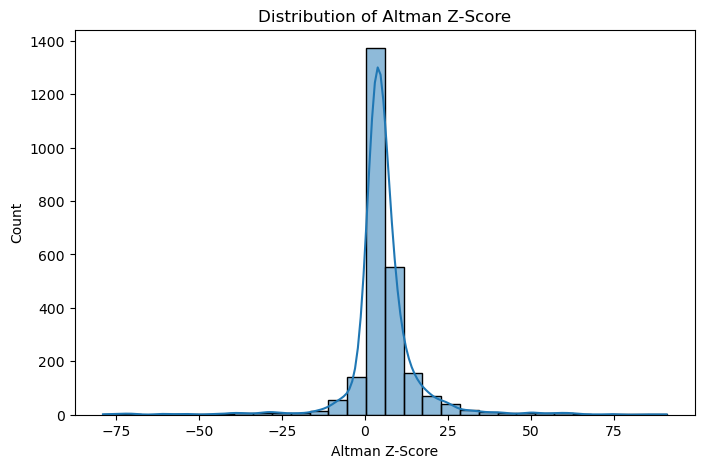

In [2352]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['AZS'], bins=30, kde=True)
plt.title('Distribution of Altman Z-Score')
plt.xlabel('Altman Z-Score')
plt.show()


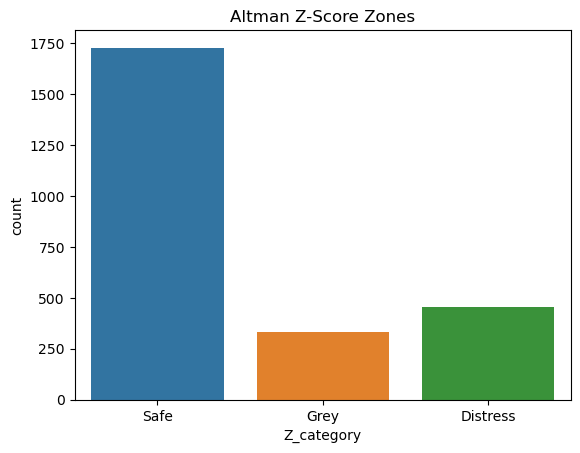

In [2353]:
def z_score_category(z):
    if z > 2.99:
        return 'Safe'
    elif z < 1.81:
        return 'Distress'
    else:
        return 'Grey'

df_cleaned['Z_category'] = df_cleaned['AZS'].apply(z_score_category)

sns.countplot(x='Z_category', data=df_cleaned)
plt.title('Altman Z-Score Zones')
plt.show()

R&D Intensity

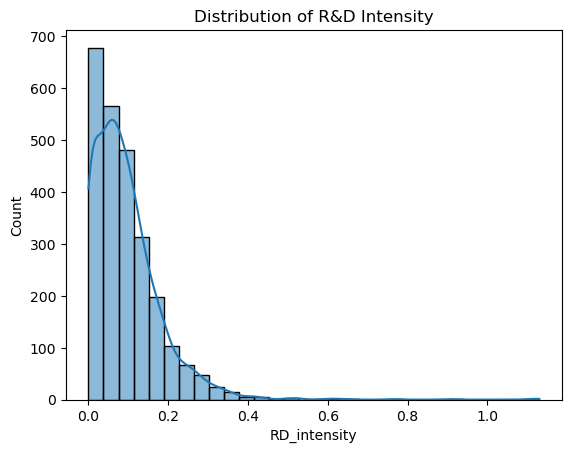

In [2354]:
sns.histplot(df_cleaned['RD_intensity'], bins=30, kde=True)
plt.title('Distribution of R&D Intensity')
plt.show()

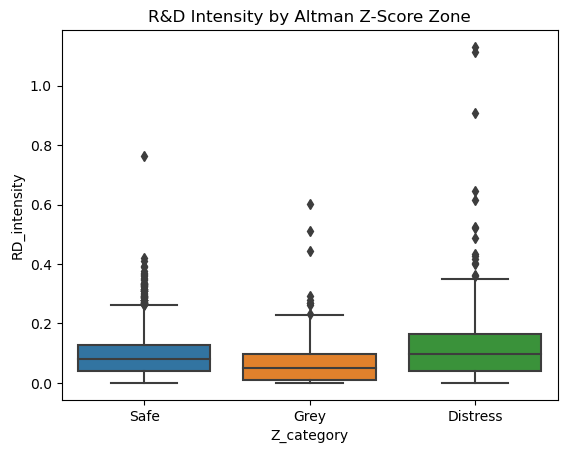

In [2355]:
sns.boxplot(x='Z_category', y='RD_intensity', data=df_cleaned)
plt.title('R&D Intensity by Altman Z-Score Zone')
plt.show()

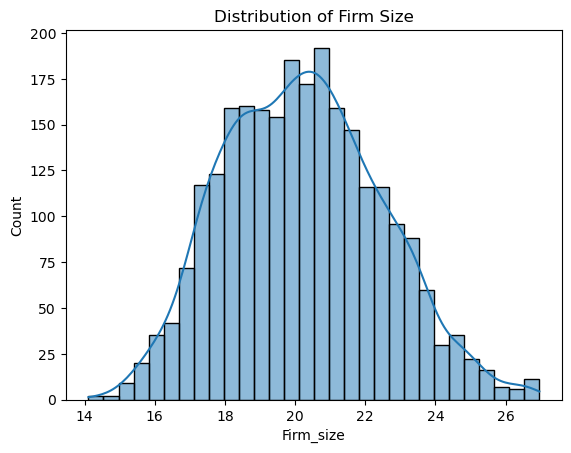

In [2356]:
sns.histplot(df_cleaned['Firm_size'], bins=30, kde=True)
plt.title('Distribution of Firm Size')
plt.show()

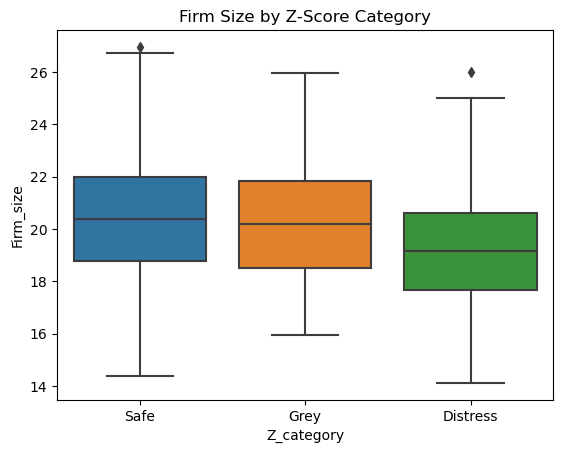

In [2357]:
sns.boxplot(x='Z_category', y='Firm_size', data=df_cleaned)
plt.title('Firm Size by Z-Score Category')
plt.show()

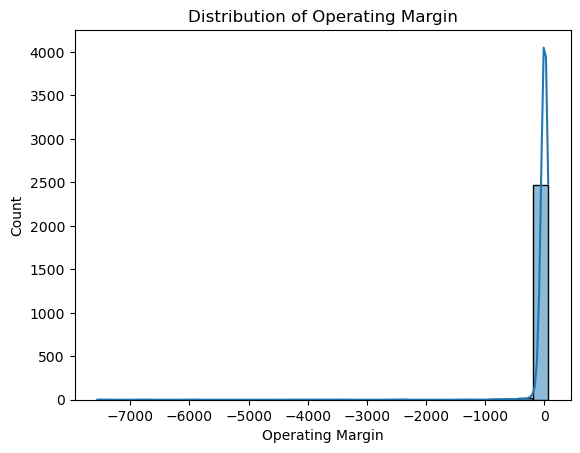

In [2358]:
sns.histplot(df_cleaned['Operating Margin'], bins=30, kde=True)
plt.title('Distribution of Operating Margin')
plt.show()

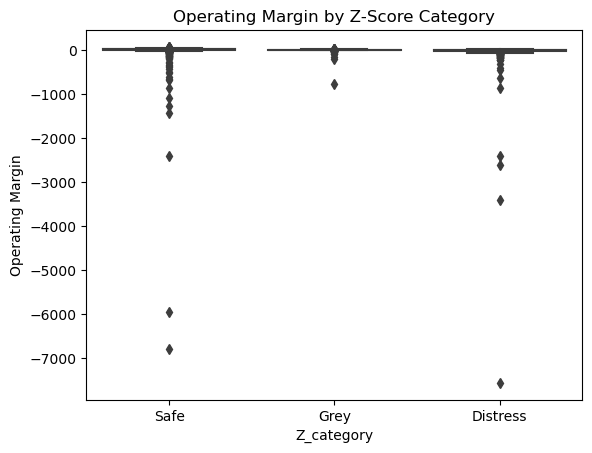

In [2359]:
sns.boxplot(x='Z_category', y='Operating Margin', data=df_cleaned)
plt.title('Operating Margin by Z-Score Category')
plt.show()

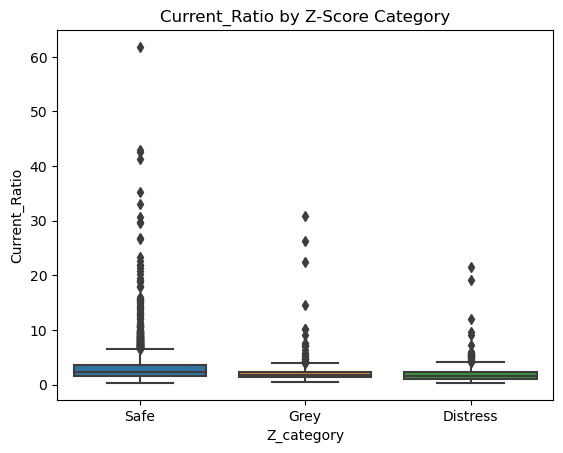

In [2360]:
sns.boxplot(x='Z_category', y='Current_Ratio', data=df_cleaned)
plt.title('Current_Ratio by Z-Score Category')
plt.show()

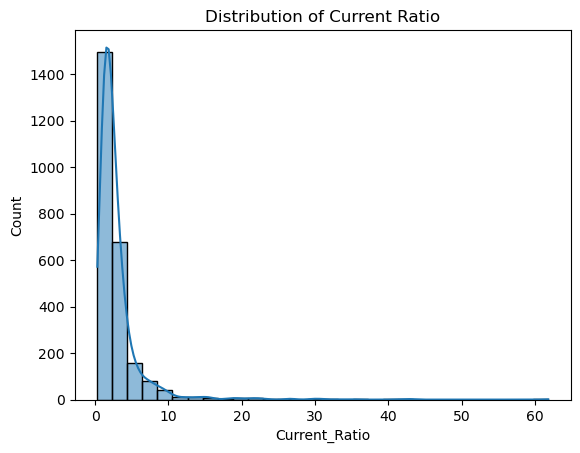

In [2361]:
sns.histplot(df_cleaned['Current_Ratio'], bins=30, kde=True)
plt.title('Distribution of Current Ratio')
plt.show()

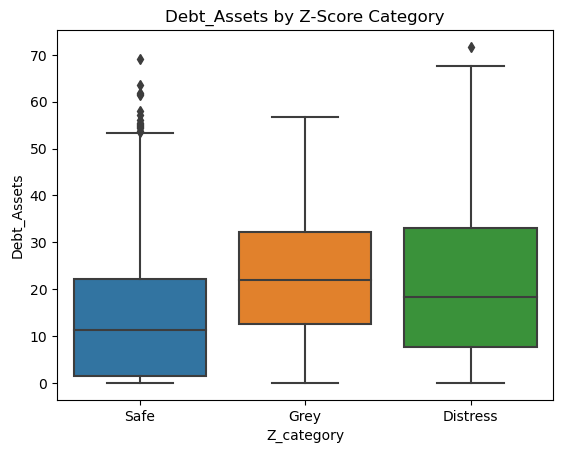

In [2362]:
sns.boxplot(x='Z_category', y='Debt_Assets', data=df_cleaned)
plt.title('Debt_Assets by Z-Score Category')
plt.show()


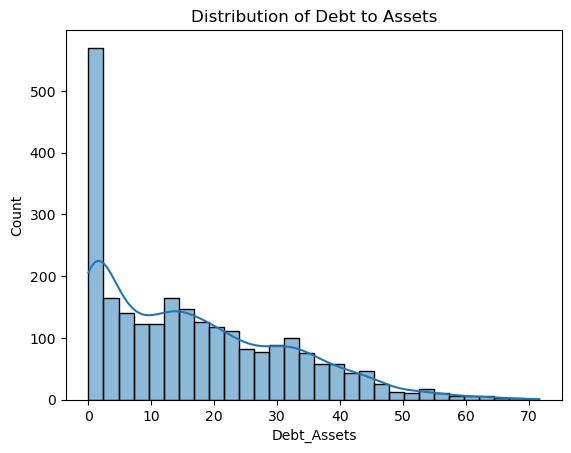

In [2363]:
sns.histplot(df_cleaned['Debt_Assets'], bins=30, kde=True)
plt.title('Distribution of Debt to Assets')
plt.show()

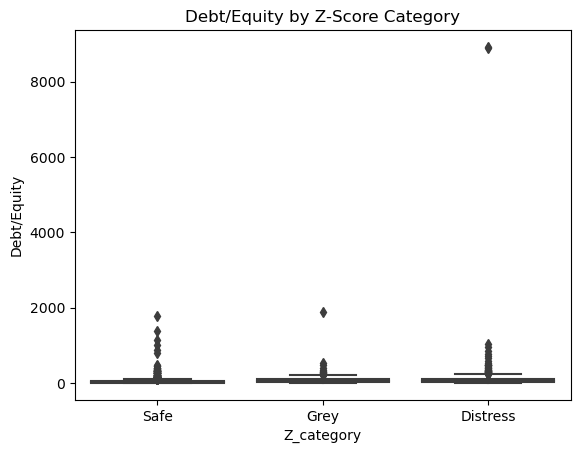

In [2364]:
sns.boxplot(x='Z_category', y='Debt/Equity', data=df_cleaned)
plt.title('Debt/Equity by Z-Score Category')
plt.show()

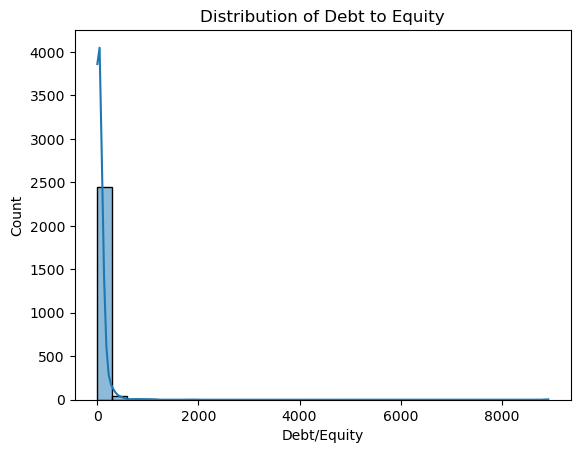

In [2365]:
sns.histplot(df_cleaned['Debt/Equity'], bins=30, kde=True)
plt.title('Distribution of Debt to Equity')
plt.show()

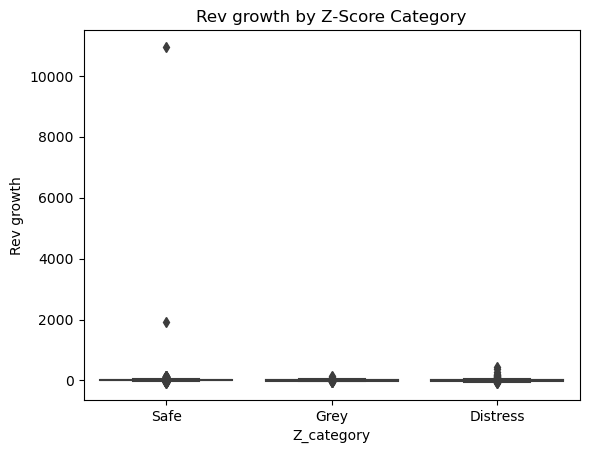

In [2366]:
sns.boxplot(x='Z_category', y='Rev growth', data=df_cleaned)
plt.title('Rev growth by Z-Score Category')
plt.show()

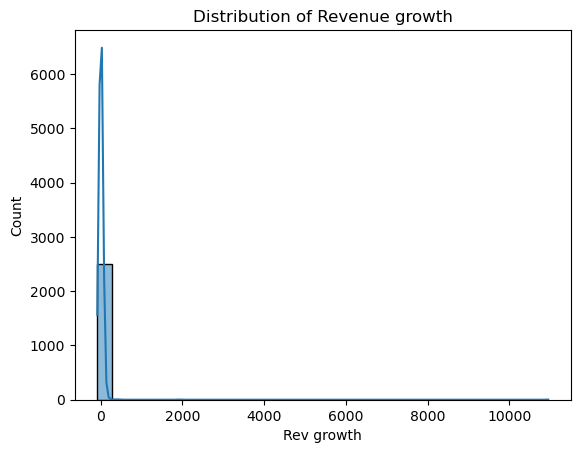

In [2367]:
sns.histplot(df_cleaned['Rev growth'], bins=30, kde=True)
plt.title('Distribution of Revenue growth')
plt.show()

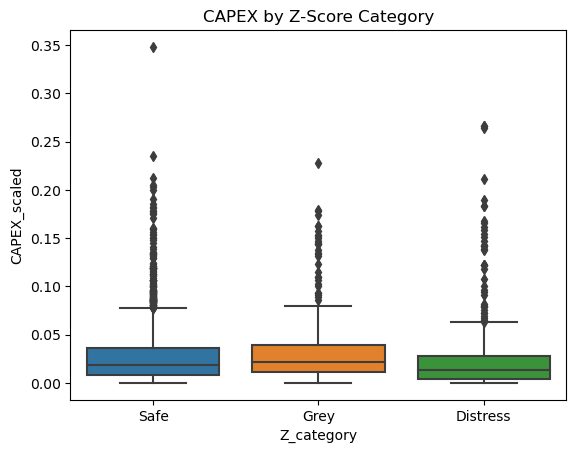

In [2368]:
sns.boxplot(x='Z_category', y='CAPEX_scaled', data=df_cleaned)
plt.title('CAPEX by Z-Score Category')
plt.show()

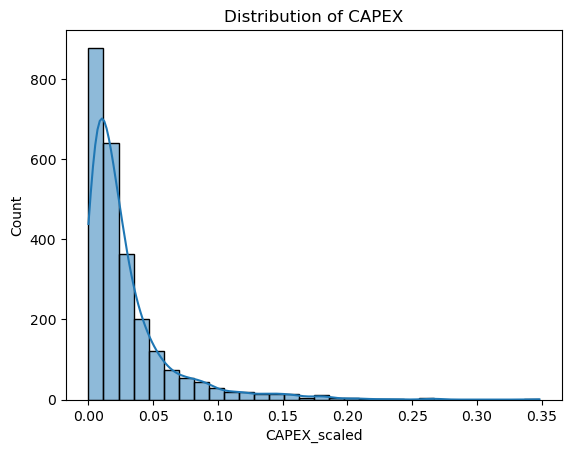

In [2369]:
sns.histplot(df_cleaned['CAPEX_scaled'], bins=30, kde=True)
plt.title('Distribution of CAPEX')
plt.show()

CORRELATION ANALYSIS

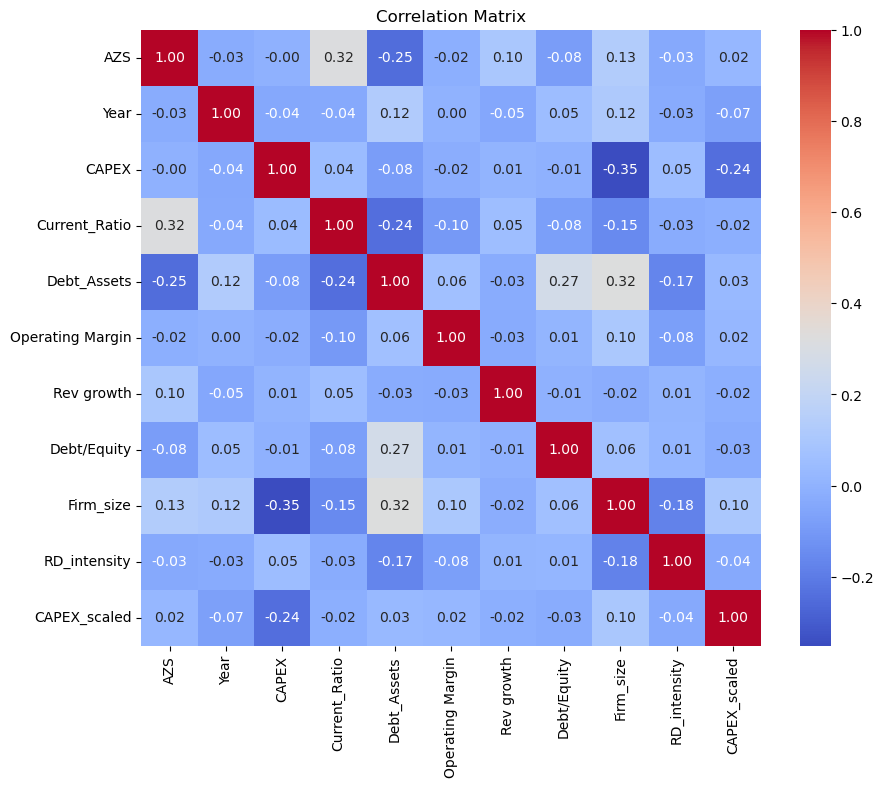

In [2370]:
corr = df_cleaned.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

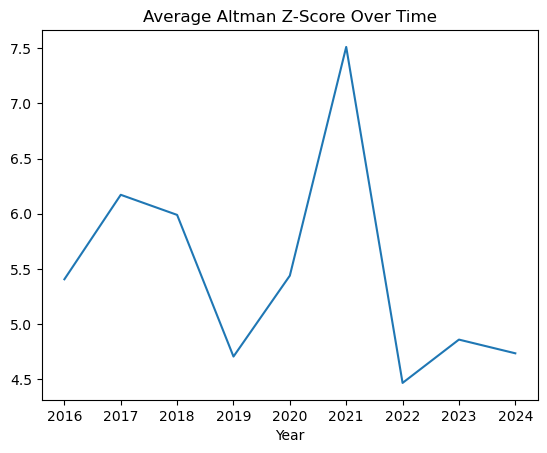

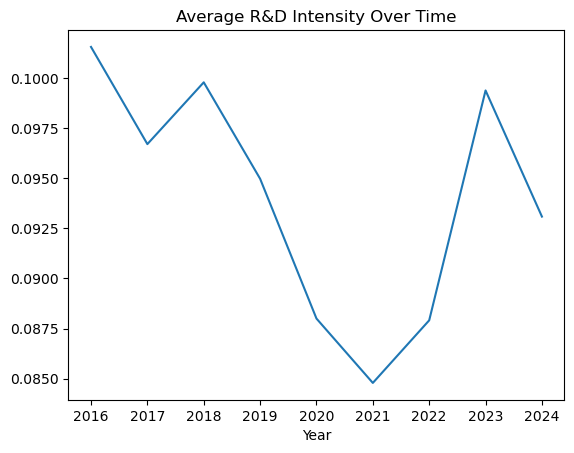

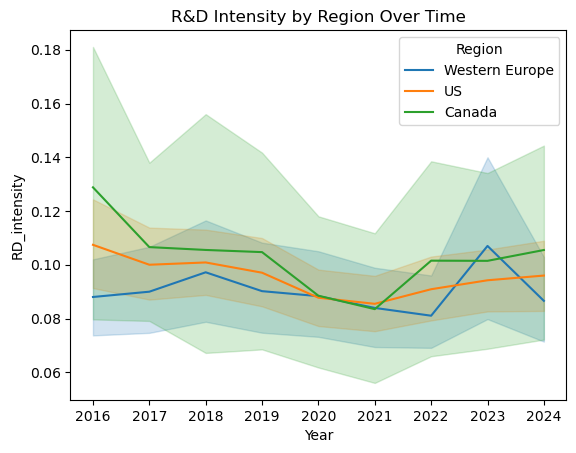

In [2371]:
# Mean Z-score over time
df_cleaned.groupby('Year')['AZS'].mean().plot()
plt.title('Average Altman Z-Score Over Time')
plt.show()

# Mean R&D Intensity over time
df_cleaned.groupby('Year')['RD_intensity'].mean().plot()
plt.title('Average R&D Intensity Over Time')
plt.show()

sns.lineplot(x='Year', y='RD_intensity', hue='Region', data=df_cleaned)
plt.title('R&D Intensity by Region Over Time')
plt.show()

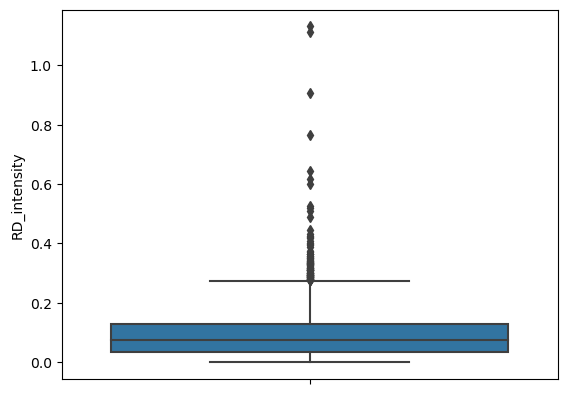

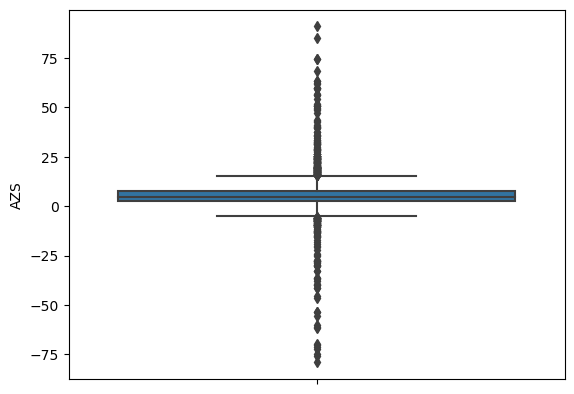

In [2372]:
sns.boxplot(y='RD_intensity', data=df_cleaned)
plt.show()

sns.boxplot(y='AZS', data=df_cleaned)
plt.show()

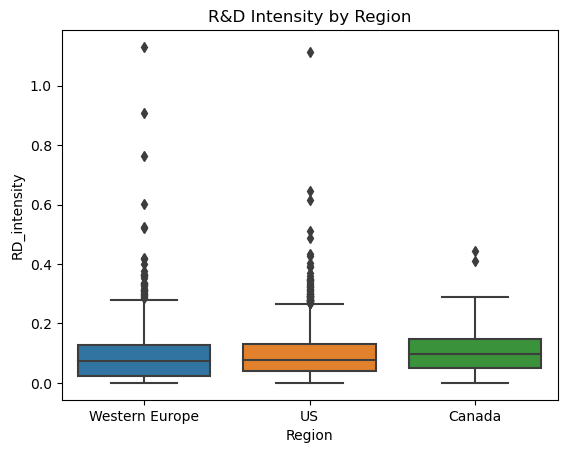

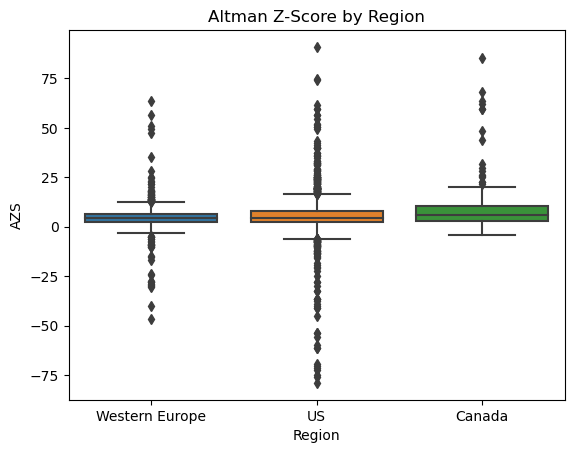

In [2373]:
sns.boxplot(x='Region', y='RD_intensity', data=df_cleaned)
plt.title('R&D Intensity by Region')
plt.show()

sns.boxplot(x='Region', y='AZS', data=df_cleaned)
plt.title('Altman Z-Score by Region')
plt.show()

Changes to the dataset after EDA

In [2374]:
lower_bound = -10
upper_bound = 10

# Apply winsorizing using clip
df_cleaned["AZS_Wins"] = df_cleaned["AZS"].clip(lower=lower_bound, upper=upper_bound)

# Optional: check how many values were capped
num_capped_lower = (df_cleaned["AZS"] < lower_bound).sum()
num_capped_upper = (df_cleaned["AZS"] > upper_bound).sum()

print(f"Number of values capped to {lower_bound}: {num_capped_lower}")
print(f"Number of values capped to {upper_bound}: {num_capped_upper}")

df_cleaned["AZS_Wins"].describe(percentiles=[.01, .05, .95, .99])

Number of values capped to -10: 65
Number of values capped to 10: 405


count    2511.000000
mean        4.433321
std         4.388267
min       -10.000000
1%        -10.000000
5%         -4.330950
50%         4.382200
95%        10.000000
99%        10.000000
max        10.000000
Name: AZS_Wins, dtype: float64

In [2375]:
outlier_vars = ['Operating Margin', 'Rev growth', 'Current_Ratio','Debt/Equity','Debt_Assets']
for col in outlier_vars:
    df_cleaned[f"{col}_wins"] = df_cleaned[col].clip(lower=df_cleaned[col].quantile(0.01),
                                                      upper=df_cleaned[col].quantile(0.99))


# Create categorical Z-score variable
df_cleaned['Z_category'] = pd.cut(df_cleaned['AZS'], bins=[-np.inf, 1.81, 2.99, np.inf], labels=['Distress', 'Grey', 'Safe'])

# Create binary distress indicator
df_cleaned['Distress_Binary'] = (df_cleaned['AZS'] < 1.81).astype(int)

# Centering

df_cleaned['RD_intensity_cent'] = df_cleaned['RD_intensity'] - df_cleaned['RD_intensity'].mean()
df_cleaned['Firm_size_cent'] = df_cleaned['Firm_size'] - df_cleaned['Firm_size'].mean()

# Log transformations for skewed variables

#df_cleaned['Log_RD_intensity_cent'] = np.log1p(df_cleaned['RD_intensity_cent'])

df_cleaned['Log_RD_intensity'] = np.log1p(df_cleaned['RD_intensity'])

df_cleaned['RD_intensity_cent_sq']= df_cleaned['RD_intensity_cent'] **2
        
# Create interaction terms

df_cleaned['RD_Size_Interaction'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Firm_size_cent']
df_cleaned['RD_Op_Interaction'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Operating Margin_wins']
df_cleaned['RD_Curr_Interaction'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Current_Ratio_wins']

#df_cleaned['RD_Size_Interaction'] = df_cleaned['RD_intensity'] * df_cleaned['Firm_size_cent']

        
# Create R&D efficiency measure (if revenue growth available)

df_cleaned['RD_Efficiency'] = df_cleaned['Rev growth'] / (df_cleaned['RD_intensity_cent'] + 0.001)

#df_cleaned['RD_Efficiency'] = df_cleaned['Rev growth'] / (df_cleaned['RD_intensity'] + 0.001)

        
print(f"Final dataset shape: {df_cleaned.shape}")

df_cleaned

Final dataset shape: (2511, 30)


,Ticker,Name,AZS,Year,CAPEX,Current_Ratio,Debt_Assets,Operating Margin,Rev growth,Debt/Equity,...,Debt_Assets_wins,Distress_Binary,RD_intensity_cent,Firm_size_cent,Log_RD_intensity,RD_intensity_cent_sq,RD_Size_Interaction,RD_Op_Interaction,RD_Curr_Interaction,RD_Efficiency
0,4966 TT Equity,PARADE TECHNOLOGIES LTD,12.5028,2016,-60271000.0,2.8252,0.0000,16.3241,26.6665,0.0000,...,0.0000,0,0.051278,2.792412,0.135668,0.002629,0.143190,0.837074,0.144872,510.086508
1,4966 TT Equity,PARADE TECHNOLOGIES LTD,14.9740,2017,-201126000.0,3.4456,0.0000,19.0162,13.6730,0.0000,...,0.0000,0,0.037089,2.864226,0.123201,0.001376,0.106233,0.705301,0.127795,358.970542
2,4966 TT Equity,PARADE TECHNOLOGIES LTD,15.1034,2018,-157412992.0,3.9185,0.0000,18.8327,0.1167,0.0000,...,0.0000,0,0.032959,2.991905,0.119543,0.001086,0.098609,0.620698,0.129148,3.436543
3,4966 TT Equity,PARADE TECHNOLOGIES LTD,14.1443,2019,-76972000.0,4.4004,1.3181,20.3045,13.9591,1.6123,...,1.3181,0,0.026326,3.126813,0.113640,0.000693,0.082317,0.534540,0.115846,510.832806
4,4966 TT Equity,PARADE TECHNOLOGIES LTD,21.6993,2020,-226959008.0,3.2870,1.5076,24.1097,29.3719,1.9694,...,1.5076,0,0.017540,3.311640,0.105767,0.000308,0.058087,0.422893,0.057655,1584.212849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,ZDGE US Equity,ZEDGE INC-CL B,7.3596,2020,-759000.0,2.3798,4.2815,-4.2555,7.4183,5.7850,...,4.2815,0,-0.094023,-3.918300,0.000000,0.008840,0.368410,0.400114,-0.223755,-79.747118
2507,ZDGE US Equity,ZEDGE INC-CL B,16.5640,2021,-653000.0,6.6107,0.6164,39.8743,106.6420,0.6967,...,0.6164,0,-0.094023,-2.779896,0.000000,0.008840,0.261374,-3.740021,-0.621557,-1146.407152
2508,ZDGE US Equity,ZEDGE INC-CL B,4.6976,2022,-611000.0,2.2978,3.5203,44.5960,35.6482,4.3519,...,3.5203,0,-0.094023,-2.403114,0.000000,0.008840,0.225947,-3.740021,-0.216046,-383.220039
2509,ZDGE US Equity,ZEDGE INC-CL B,2.7757,2023,-1016000.0,3.7467,4.9796,-25.3698,2.6220,6.0004,...,4.9796,0,-0.094023,-2.557078,0.000000,0.008840,0.240424,2.385340,-0.352275,-28.186639


In [2376]:
df_cleaned['CAPEX_scaled'].describe()

count    2511.000000
mean        0.028802
std         0.034317
min        -0.000000
25%         0.008041
50%         0.017959
75%         0.035087
max         0.348251
Name: CAPEX_scaled, dtype: float64

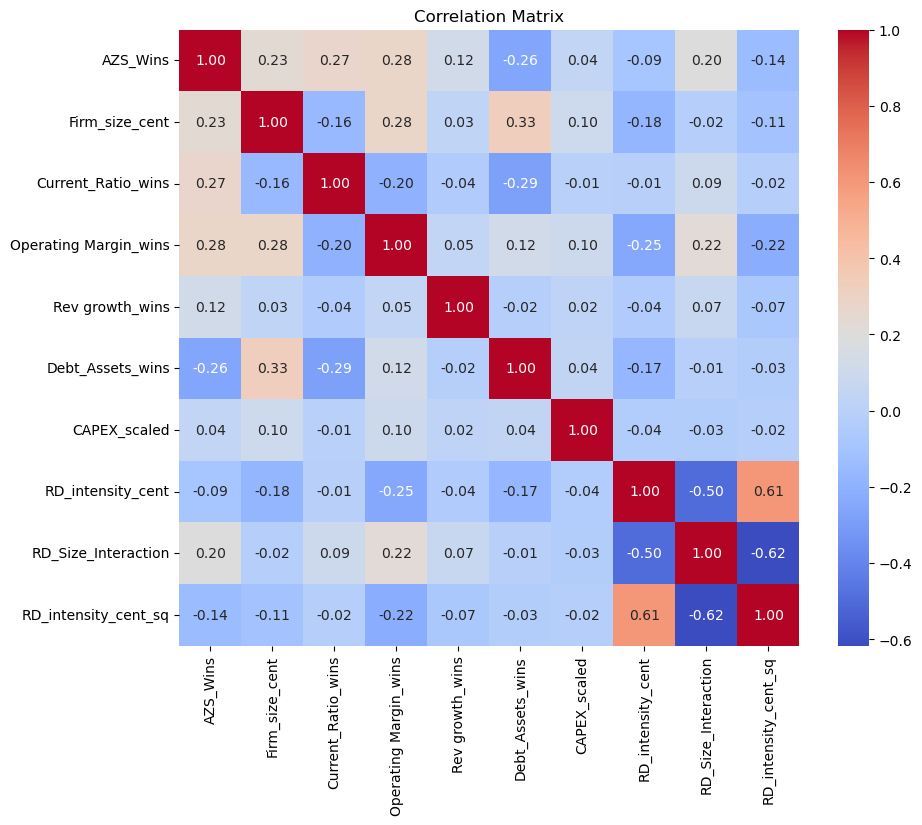

In [2377]:
numeric_vars = ['AZS_Wins', 'Firm_size_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled',
                       'RD_intensity_cent','RD_Size_Interaction','RD_intensity_cent_sq']

corr = df_cleaned[numeric_vars].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [2378]:
# Check for multicollinearity (VIF)
X = df_cleaned[numeric_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
print("Variance Inflation Factors (VIF > 5 indicates multicollinearity):")

print(vif_data)

print(vif_data.to_latex())

Variance Inflation Factors (VIF > 5 indicates multicollinearity):
                Variable       VIF
0               AZS_Wins  2.328435
1         Firm_size_cent  1.267987
2     Current_Ratio_wins  2.275663
3  Operating Margin_wins  1.309262
4        Rev growth_wins  1.200125
5       Debt_Assets_wins  1.616666
6           CAPEX_scaled  1.590870
7      RD_intensity_cent  1.761154
8    RD_Size_Interaction  1.833024
9   RD_intensity_cent_sq  2.099051
\begin{tabular}{llr}
\toprule
{} &               Variable &       VIF \\
\midrule
0 &               AZS\_Wins &  2.328435 \\
1 &         Firm\_size\_cent &  1.267987 \\
2 &     Current\_Ratio\_wins &  2.275663 \\
3 &  Operating Margin\_wins &  1.309262 \\
4 &        Rev growth\_wins &  1.200125 \\
5 &       Debt\_Assets\_wins &  1.616666 \\
6 &           CAPEX\_scaled &  1.590870 \\
7 &      RD\_intensity\_cent &  1.761154 \\
8 &    RD\_Size\_Interaction &  1.833024 \\
9 &   RD\_intensity\_cent\_sq &  2.099051 \\
\bottomrule
\end{tabular}



In [2379]:
from scipy.stats import kruskal

# Kruskal-Wallis test (non-parametric ANOVA)
kruskal_test = kruskal(
    df_cleaned[df_cleaned['Z_category'] == 'Safe']['RD_intensity'],
    df_cleaned[df_cleaned['Z_category'] == 'Grey']['RD_intensity'],
    df_cleaned[df_cleaned['Z_category'] == 'Distress']['RD_intensity']
)
print(kruskal_test)

KruskalResult(statistic=79.34692505392499, pvalue=5.888899551994587e-18)


In [2380]:
from linearmodels.panel import PanelOLS

# Make sure Firm_ID and Year are treated as a MultiIndex
cleaned_df = df_cleaned.set_index(['Ticker', 'Year'])

# Define your list of independent variables
independent_vars = ['Firm_size_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled',
                       'RD_intensity_cent','RD_Size_Interaction','RD_intensity_cent_sq']
# Add a constant if you want (although FE removes firm-level constant by demeaning)
from statsmodels.tools.tools import add_constant

# Run Fixed Effects
model = PanelOLS(
    dependent=cleaned_df["AZS_Wins"],
    exog=cleaned_df[independent_vars],
    entity_effects=True,
    time_effects=True
)

results = model.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)
#print(results.summary.as_latex())

                          PanelOLS Estimation Summary                           
Dep. Variable:               AZS_Wins   R-squared:                        0.2841
Estimator:                   PanelOLS   R-squared (Between):             -0.0242
No. Observations:                2511   R-squared (Within):               0.2830
Date:                Sun, Sep 14 2025   R-squared (Overall):              0.0086
Time:                        11:47:16   Log-likelihood                   -4885.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      97.658
Entities:                         279   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                  F(9,2215)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             21.102
                            

In [2381]:
from linearmodels.panel import compare

fe_model = PanelOLS(
    cleaned_df["AZS_Wins"],
    cleaned_df[independent_vars],
    entity_effects=True,
    time_effects=True
).fit()

from linearmodels.panel import RandomEffects

re_model = RandomEffects(
    cleaned_df["AZS_Wins"],
    cleaned_df[independent_vars]
).fit()

comparison = compare({'FE': fe_model, 'RE': re_model})
print(comparison)


                     Model Comparison                     
                                      FE                RE
----------------------------------------------------------
Dep. Variable                   AZS_Wins          AZS_Wins
Estimator                       PanelOLS     RandomEffects
No. Observations                    2511              2511
Cov. Est.                     Unadjusted        Unadjusted
R-squared                         0.2841            0.2755
R-Squared (Within)                0.2830            0.2467
R-Squared (Between)              -0.0242            0.3860
R-Squared (Overall)               0.0086            0.3711
F-statistic                       97.658            105.70
P-value (F-stat)                  0.0000            0.0000
=======================     ============   ===============
Firm_size_cent                    0.8383            0.5246
                                (6.9048)          (7.1057)
Current_Ratio_wins                0.3126            0.55

In [2382]:
from linearmodels.panel import PanelOLS

y = cleaned_df['Distress_Binary']

# Independent variables
X = cleaned_df[independent_vars]

logit_model = PanelOLS(y, X, entity_effects=True, time_effects=True)

logit_results = logit_model.fit(cov_type='clustered', cluster_entity=True)
       
print("Logistic Regression Results:")
print(logit_results.summary)

print(logit_results.summary.as_latex())
        
# Calculate odds ratios
odds_ratios = np.exp(logit_results.params)
print("\nOdds Ratios:")
print(odds_ratios)
print(odds_ratios.to_latex())

Logistic Regression Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:        Distress_Binary   R-squared:                        0.1224
Estimator:                   PanelOLS   R-squared (Between):              0.2788
No. Observations:                2511   R-squared (Within):               0.1236
Date:                Sun, Sep 14 2025   R-squared (Overall):              0.2295
Time:                        11:47:17   Log-likelihood                    211.34
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.339
Entities:                         279   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                  F(9,2215)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             9.2912

In [2383]:
print(df_cleaned['Distress_Binary'].value_counts())


0    2058
1     453
Name: Distress_Binary, dtype: int64


In [2384]:

df_cleaned['Region'].unique()

array(['Western Europe', 'US', 'Canada'], dtype=object)

In [2385]:
df_cleaned['Region'].value_counts()

US                1431
Western Europe     927
Canada             153
Name: Region, dtype: int64

In [2386]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Region'], drop_first=False)

In [2387]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Ticker                 2511 non-null   object  
 1   Name                   2511 non-null   object  
 2   AZS                    2511 non-null   float64 
 3   Year                   2511 non-null   int64   
 4   CAPEX                  2511 non-null   float64 
 5   Current_Ratio          2511 non-null   float64 
 6   Debt_Assets            2511 non-null   float64 
 7   Operating Margin       2511 non-null   float64 
 8   Rev growth             2511 non-null   float64 
 9   Debt/Equity            2511 non-null   float64 
 10  Firm_size              2511 non-null   float64 
 11  RD_intensity           2511 non-null   float64 
 12  CAPEX_scaled           2511 non-null   float64 
 13  Z_category             2511 non-null   category
 14  AZS_Wins               2511 non-null   f

In [2388]:
#df_cleaned['RD_US_Firm'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Region_US'] 
#df_cleaned['RD_WesternEurope_Firm'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Region_Western Europe'] 

#df_cleaned['RD_US_Firm'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Region_US'] * df_cleaned['Firm_size_cent']
df_cleaned['RD_Canada_Firm'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Region_Canada'] * df_cleaned['Firm_size_cent']
df_cleaned['RD_WesternEurope_Firm'] = df_cleaned['RD_intensity_cent'] * df_cleaned['Region_Western Europe'] * df_cleaned['Firm_size_cent']

In [2389]:
# Make sure Firm_ID and Year are treated as a MultiIndex
cleaned_df = df_cleaned.set_index(['Ticker', 'Year'])

# Define your list of independent variables
independent_vars = ['Firm_size_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled',
                       'RD_intensity_cent','RD_Size_Interaction', 'RD_WesternEurope_Firm', 'RD_Canada_Firm']
# Add a constant if you want (although FE removes firm-level constant by demeaning)
from statsmodels.tools.tools import add_constant

# Run Fixed Effects
model = PanelOLS(
    dependent=cleaned_df["AZS_Wins"],
    exog=cleaned_df[independent_vars],
    entity_effects=True,
    time_effects=True
)

results = model.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)
print(results.summary.as_latex())

                          PanelOLS Estimation Summary                           
Dep. Variable:               AZS_Wins   R-squared:                        0.2844
Estimator:                   PanelOLS   R-squared (Between):             -0.0254
No. Observations:                2511   R-squared (Within):               0.2832
Date:                Sun, Sep 14 2025   R-squared (Overall):              0.0076
Time:                        11:47:17   Log-likelihood                   -4884.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      87.982
Entities:                         279   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                 F(10,2214)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             19.053
                            

In [2390]:
# US
df_cleaned['Recession_US'] = (df_cleaned['Year'] == 2020) & (df_cleaned['Region_US']).astype(int)

# Western Europe
df_cleaned['Recession_Europe'] = (df_cleaned['Year'] == 2020) & (df_cleaned['Region_Western Europe']).astype(int)

In [2391]:

df_cleaned['RD_intensity_lag1'] = df_cleaned['RD_intensity_cent'].shift(1)
df_cleaned['RDlag_Size_Interaction']= df_cleaned['RD_intensity_lag1'] * df_cleaned['Firm_size']

In [2392]:
# Make sure Firm_ID and Year are treated as a MultiIndex
cleaned_df = df_cleaned.set_index(['Ticker', 'Year'])

# Define your list of independent variables
independent_vars = ['Firm_size_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled',
                       'RD_intensity_lag1','RDlag_Size_Interaction']
# Add a constant if you want (although FE removes firm-level constant by demeaning)
from statsmodels.tools.tools import add_constant

# Run Fixed Effects
model = PanelOLS(
    dependent=cleaned_df["AZS_Wins"],
    exog=cleaned_df[independent_vars],
    entity_effects=True,
    time_effects=True
)

results = model.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)
print(results.summary.as_latex())

                          PanelOLS Estimation Summary                           
Dep. Variable:               AZS_Wins   R-squared:                        0.2797
Estimator:                   PanelOLS   R-squared (Between):             -0.0028
No. Observations:                2510   R-squared (Within):               0.2786
Date:                Sun, Sep 14 2025   R-squared (Overall):              0.0266
Time:                        11:47:17   Log-likelihood                   -4891.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      107.53
Entities:                         279   P-value                           0.0000
Avg Obs:                       8.9964   Distribution:                  F(8,2215)
Min Obs:                       8.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             24.705
                            

In [2393]:
df_cleaned['Recession'] = (df_cleaned['Year']==2020).astype(int)
df_cleaned['Recession_RD']= df_cleaned['RD_intensity']*df_cleaned['Recession']


In [2394]:
# Make sure Firm_ID and Year are treated as a MultiIndex
cleaned_df = df_cleaned.set_index(['Ticker', 'Year'])

# Define your list of independent variables
independent_vars = ['Firm_size_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled',
                       'RD_intensity_cent','RD_Size_Interaction','RD_intensity_cent_sq', 'Recession']
# Add a constant if you want (although FE removes firm-level constant by demeaning)
from statsmodels.tools.tools import add_constant

# Run Fixed Effects
model = PanelOLS(
    dependent=cleaned_df["AZS_Wins"],
    exog=cleaned_df[independent_vars],
    entity_effects=True,
)

results = model.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)
print(results.summary.as_latex())

                          PanelOLS Estimation Summary                           
Dep. Variable:               AZS_Wins   R-squared:                        0.2851
Estimator:                   PanelOLS   R-squared (Between):              0.0004
No. Observations:                2511   R-squared (Within):               0.2851
Date:                Sun, Sep 14 2025   R-squared (Overall):              0.0308
Time:                        11:47:17   Log-likelihood                   -4929.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      88.615
Entities:                         279   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                 F(10,2222)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             24.780
                            

In [2395]:


print(df_cleaned.describe().to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &          AZS &         Year &         CAPEX &  Current\_Ratio &  Debt\_Assets &  Operating Margin &    Rev growth &  Debt/Equity &    Firm\_size &  RD\_intensity &  CAPEX\_scaled &     AZS\_Wins &  Operating Margin\_wins &  Rev growth\_wins &  Current\_Ratio\_wins &  Debt/Equity\_wins &  Debt\_Assets\_wins &  Distress\_Binary &  RD\_intensity\_cent &  Firm\_size\_cent &  Log\_RD\_intensity &  RD\_intensity\_cent\_sq &  RD\_Size\_Interaction &  RD\_Op\_Interaction &  RD\_Curr\_Interaction &  RD\_Efficiency &  Region\_Canada &    Region\_US &  Region\_Western Europe &  RD\_Canada\_Firm &  RD\_WesternEurope\_Firm &  RD\_intensity\_lag1 &  RDlag\_Size\_Interaction &    Recession &  Recession\_RD \\
\midrule
count &  2511.000000 &  2511.000000 &  2.511000e+03 &    2511.000000 &  2511.000000 &       2511.000000 &   2511.000000 &  2511.000000 &  2511.000000 &   2511.000000 &   2511.000000 &  2511.000000 &            2511.0000

In [2396]:
for i in range(0, len(df_cleaned.columns), 10):
    print(df_cleaned.iloc[:, i:i+6].describe().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          AZS &         Year &         CAPEX &  Current\_Ratio \\
\midrule
count &  2511.000000 &  2511.000000 &  2.511000e+03 &    2511.000000 \\
mean  &     5.475186 &  2020.000000 & -3.109751e+08 &       2.927931 \\
std   &    10.895205 &     2.582503 &  1.949262e+09 &       3.517678 \\
min   &   -79.026900 &  2016.000000 & -4.447700e+10 &       0.301300 \\
25\%   &     2.446550 &  2018.000000 & -6.395200e+07 &       1.352400 \\
50\%   &     4.382200 &  2020.000000 & -9.710000e+06 &       2.018000 \\
75\%   &     7.619800 &  2022.000000 & -1.593000e+06 &       3.195900 \\
max   &    90.940500 &  2024.000000 &  0.000000e+00 &      61.821900 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &    Firm\_size &  RD\_intensity &  CAPEX\_scaled &     AZS\_Wins &  Operating Margin\_wins \\
\midrule
count &  2511.000000 &   2511.000000 &   2511.000000 &  2511.000000 &            2511.000000 \\
mean  &    20.219134 &      0.094023 &      0.0

In [2397]:
import pandas as pd
import math

# Round numbers for readability
df_desc = df_cleaned[['AZS_Wins', 'Firm_size_cent','RD_intensity_cent', 'Current_Ratio_wins', 
                       'Operating Margin_wins', 'Rev growth_wins', 'Debt_Assets_wins', 'CAPEX_scaled']].describe()

# Split columns if too many (adjust 10 to whatever fits your page)
columns_per_table = 4
num_columns = len(df_desc.columns)
num_tables = math.ceil(num_columns / columns_per_table)

latex_code = ""

for i in range(num_tables):
    start = i * columns_per_table
    end = start + columns_per_table
    subset = df_desc.iloc[:, start:end]
    
    latex_code += (
        "\\begin{table}[h!]\n"
        "\\centering\n"
        "\\resizebox{\\textwidth}{!}{%\n"
        f"{subset.to_latex(index=True, header=True)}\n"
        "}\n"
        f"\\caption{{Summary Statistics (Columns {start+1}–{min(end, num_columns)})}}\n"
        "\\end{table}\n\n"
    )

print(latex_code)

\begin{table}[h!]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{lrrrr}
\toprule
{} &     AZS\_Wins &  Firm\_size\_cent &  RD\_intensity\_cent &  Current\_Ratio\_wins \\
\midrule
count &  2511.000000 &    2.511000e+03 &       2.511000e+03 &         2511.000000 \\
mean  &     4.433321 &    3.369489e-14 &       1.127467e-17 &            2.834181 \\
std   &     4.388267 &    2.239611e+00 &       8.808085e-02 &            2.728951 \\
min   &   -10.000000 &   -6.109379e+00 &      -9.402280e-02 &            0.546770 \\
25\%   &     2.446550 &   -1.704104e+00 &      -6.044936e-02 &            1.352400 \\
50\%   &     4.382200 &   -7.954774e-02 &      -1.770393e-02 &            2.018000 \\
75\%   &     7.619800 &    1.523762e+00 &       3.637411e-02 &            3.195900 \\
max   &    10.000000 &    6.742775e+00 &       1.036375e+00 &           18.956810 \\
\bottomrule
\end{tabular}

}
\caption{Summary Statistics (Columns 1–4)}
\end{table}

\begin{table}[h!]
\centering
\resizebox{\text